# **Proyecto de Titulo**

Proyecto en el cual se implementó un modelo de aprendizaje automático que en base a conjuntos de datos predice el rendimiento de un equipo. Logrando de esta forma descubrir los factores organizacionales que afectan al nivel futbolístico de un equipo.

¿A qué se refiere con factores organizacionales?, básicamente a cualquier decisión tomada por la dirigencia del club, o de la federación, que pueda afectar el nivel futbolístico del equipo, por ejemplo: el constante cambio de entrenadores, las pocas oportunidades a las divisiones inferiores, la imposibilidad de mantener en el club a los mejores jugadores sin un proyecto convincente, la poca inversión en jugadores, la poca inversión en las divisiones inferiores, etc.

¿Con qué fin?, con el objetivo de generar un caso de estudio y de esta forma ayudar a la toma de decisiones estratégicas en la interna de los equipos de futbol chilenos de cara a las competiciones internacionales de la CONMEBOL, mejorando el cumplimiento de sus objetivos en los torneos e influyendo directamente en los beneficios del club y de la liga chilena, elevando su prestigio internacional, como también su estabilidad económica.

**Link a informe final:** https://drive.google.com/file/d/1dnNZvNrrvQsxZeCf0l6_RhD6DN6ZI2nQ/view?usp=sharing

## Carga Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Carga de datos y analisis de datos nulos

Para la construcción de los conjuntos de datos de entrenamiento se tuvo que definir cuáles son las variables organizacionales de un club fútbol que pueden afectar en su rendimiento en una competición internacional. Destacando que se requiere construir dos conjuntos de datos, uno con información sobre la Copa Libertadores, y otro con información sobre la Copa Sudamericana.

Luego de estudiar el contexto se establecieron las variables a utilizar
en los dos conjuntos de datos, estas son:

*   **Nombre del equipo**, indica el nombre oficial del equipo de fútbol.
*   **Año de su participación**, indica la edición de la competición en la cual el equipo participó.
*   **País**, indicia el país al cual pertenece el equipo de fútbol.
*   **Valor de mercado**, representa la suma total de la valorización en millones de euros de los jugadores de su plantilla en el año en que el equipo participó de la competición.
*   **Promedio del valor de mercado**, representa el promedio en millones de euros del valor de mercado del equipo el año en el que participó de la competición.
*   **Promedio de edad**, representa el promedio de edad de todos los jugadores de la plantilla del equipo el año en que participó de la competición.
*   **Cantidad de jugadores en la plantilla**, representa la cantidad de jugadores inscritos por el equipo para la temporada.
*   **Cantidad de jugadores extranjeros**, representa la cantidad de jugadores extranjeros inscritos por el equipo para la temporada.
*   **Puntos Ranking de la liga**, indica los puntos de una clasificación anual de los campeonatos de primera división de todo el mundo realizado por la Federación Internacional de Historia y Estadística de Fútbol (IFFHS). Los puntos representan el número de equipos de cada liga
que participan en competiciones internacionales y los puntos que consiguen.
*   **Fase en la que inició**, representa la fase de la competición en la que el equipo inició su participación.
*   **Fase en la que terminó**, representa la fase de la competición en la que el equipo terminó su participación.



---
---


Para obtener los datos y generar los datasets se utilizó la tecnica de extracción de datos de forma automatica (scraping) desde el sitio web [transfermarkt](https://www.transfermarkt.es/).

El procedimiento para cada conjunto de datos se puede revisar en los siguientes links:
*   [Copa Libertadores](https://github.com/felipeee-mg/scraping-copa-libertadores)
*   [Copa Sudamericana](https://github.com/felipeee-mg/scraping-copa-sudamericana)




In [3]:
copa_libertadores = pd.read_csv("datasets/copa_libertadores.csv")
copa_sudamericana = pd.read_csv("datasets/copa_sudamericana.csv")

In [4]:
copa_libertadores.head()

,equipo,edicion,pais,valor_mercado,promedio_valor_mercado,promedio_edad,cantidad_jugadores,cantidad_jugadores_extranjeros,puntos_ranking_liga,fase_inicio,fase_termino
0,Clube de Regatas do Flamengo,2020,Brasil,152.20,2.818519,22.5,54,6,964.0,Fase de Grupos,Octavos de Final
1,Sociedade Esportiva Palmeiras,2020,Brasil,104.55,1.834211,22.6,57,8,964.0,Fase de Grupos,Campeón
2,Club Atlético River Plate,2020,Argentina,136.23,3.784167,25.2,36,7,603.0,Fase de Grupos,Semifinales
3,Club Atlético Boca Juniors,2020,Argentina,105.53,2.705897,24.6,39,6,603.0,Fase de Grupos,Semifinales
4,Grêmio Foot-Ball Porto Alegrense,2020,Brasil,106.60,2.132000,24.8,50,5,964.0,Fase de Grupos,Cuartos de Final


In [5]:
copa_sudamericana.head()

,equipo,edicion,pais,valor_mercado,promedio_valor_mercado,promedio_edad,cantidad_jugadores,cantidad_jugadores_extranjeros,puntos_ranking_liga,fase_inicio,fase_termino
0,Clube Atlético Mineiro,2020,Brasil,75.33,1.345179,23.3,56,10,964.0,Fase 1,Fase 1
1,São Paulo Futebol Clube,2020,Brasil,77.13,1.641064,22.9,47,6,964.0,Fase 2,Fase 2
2,Club Atlético Vélez Sarsfield,2020,Argentina,75.23,1.928974,22.8,39,5,603.0,Fase 1,Semifinales
3,Club Atlético Lanús,2020,Argentina,46.78,1.417576,21.8,33,2,603.0,Fase 1,Final
4,Fluminense Football Club,2020,Brasil,39.43,0.773137,23.3,51,3,964.0,Fase 1,Fase 1


**Se graficó la cantidad de datos no nulos por dataset para así visualizar y analizar de mejor forma estos.**

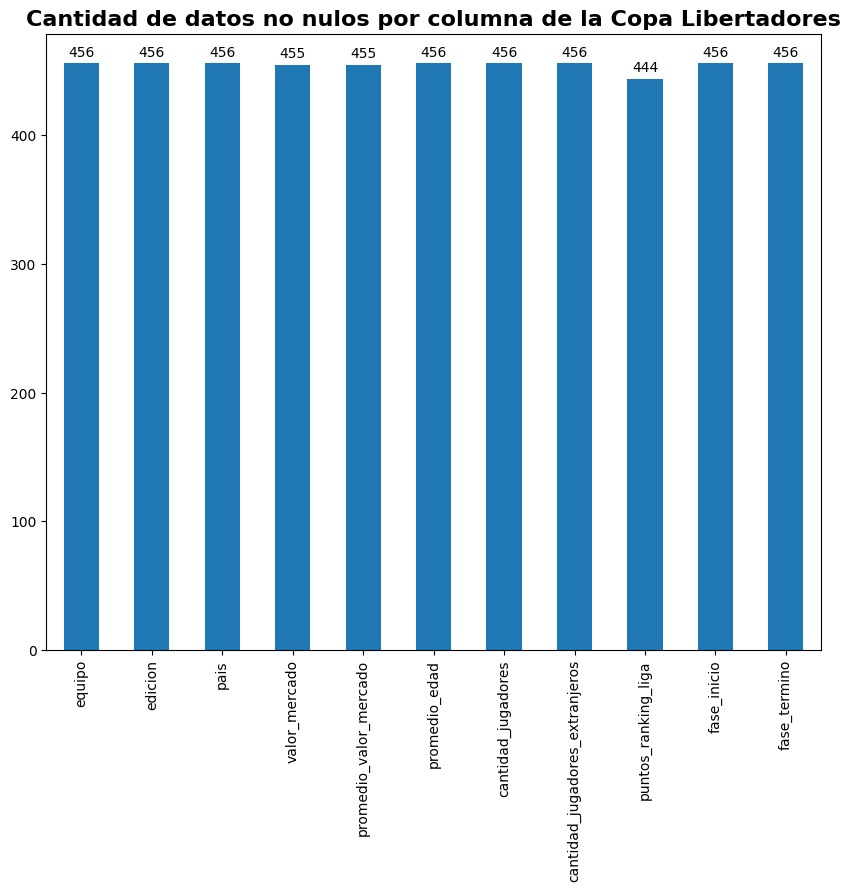

In [6]:
cantidad_datos_cl = copa_libertadores.count(axis=0)
grafico_cl = cantidad_datos_cl.plot(kind="bar", figsize=(10,8))
for p in grafico_cl.patches:
    grafico_cl.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')
grafico_cl.set_title("Cantidad de datos no nulos por columna de la Copa Libertadores", fontsize=16, weight="bold")
plt.show()

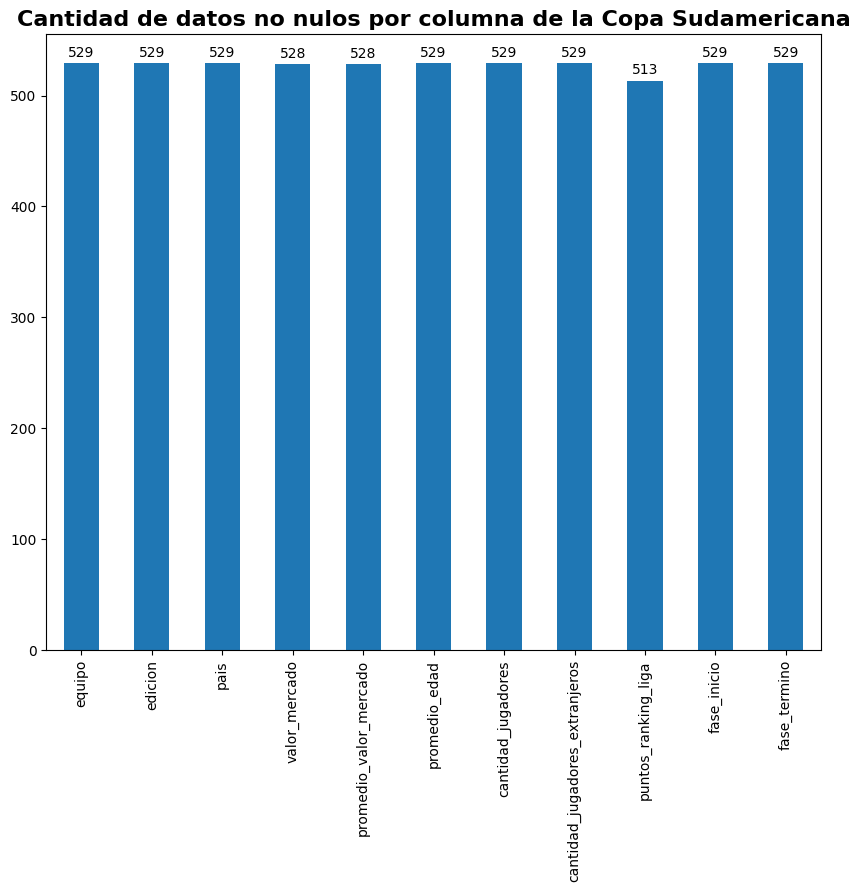

In [7]:
cantidad_datos_cs = copa_sudamericana.count(axis=0)
grafico_cs = cantidad_datos_cs.plot(kind="bar", figsize=(10,8))
for p in grafico_cs.patches:
    grafico_cs.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')
grafico_cs.set_title("Cantidad de datos no nulos por columna de la Copa Sudamericana", fontsize=16, weight="bold")
plt.show()

## Preprocesamiento

En relación al procesamiento de valores nulos, a partir del análisis anterior se infiere que, en las columnas, **valor_mercado**, **promedio_valor_mercado** y **puntos_ranking_liga** de ambos conjuntos
de datos existen datos nulos.

Por lo tanto, para no eliminar filas de los datasets y al ser pocos los datos nulos, se decidió se ingresaron manualmente los datos faltantes.


In [9]:
copa_libertadores = pd.read_csv("datasets/copa_libertadores_no_null.csv")
copa_sudamericana = pd.read_csv("datasets/copa_sudamericana_no_null.csv")

In [10]:
copa_libertadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   equipo                          456 non-null    object 
 1   edicion                         456 non-null    int64  
 2   pais                            456 non-null    object 
 3   valor_mercado                   456 non-null    float64
 4   promedio_valor_mercado          456 non-null    float64
 5   promedio_edad                   456 non-null    float64
 6   cantidad_jugadores              456 non-null    int64  
 7   cantidad_jugadores_extranjeros  456 non-null    int64  
 8   puntos_ranking_liga             456 non-null    float64
 9   fase_inicio                     456 non-null    object 
 10  fase_termino                    456 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 39.3+ KB


In [11]:
copa_sudamericana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   equipo                          529 non-null    object 
 1   edicion                         529 non-null    int64  
 2   pais                            529 non-null    object 
 3   valor_mercado                   529 non-null    float64
 4   promedio_valor_mercado          529 non-null    float64
 5   promedio_edad                   529 non-null    float64
 6   cantidad_jugadores              529 non-null    int64  
 7   cantidad_jugadores_extranjeros  529 non-null    int64  
 8   puntos_ranking_liga             529 non-null    float64
 9   fase_inicio                     529 non-null    object 
 10  fase_termino                    529 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 45.6+ KB


**Creación de Variables Ficticias (dummies) para así estandarizar las posibles variables de entrada a tipos de datos int64 o float64.**

In [12]:
copa_libertadores = pd.get_dummies(copa_libertadores, columns=['fase_inicio'])
copa_sudamericana = pd.get_dummies(copa_sudamericana, columns=['fase_inicio'])
copa_libertadores.head()

,equipo,edicion,pais,valor_mercado,promedio_valor_mercado,promedio_edad,cantidad_jugadores,cantidad_jugadores_extranjeros,puntos_ranking_liga,fase_termino,fase_inicio_Fase 1,fase_inicio_Fase 2,fase_inicio_Fase 3,fase_inicio_Fase de Grupos,fase_inicio_Octavos de Final
0,Clube de Regatas do Flamengo,2020,Brasil,152.20,2.818519,22.5,54,6,964.0,Octavos de Final,0,0,0,1,0
1,Sociedade Esportiva Palmeiras,2020,Brasil,104.55,1.834211,22.6,57,8,964.0,Campeón,0,0,0,1,0
2,Club Atlético River Plate,2020,Argentina,136.23,3.784167,25.2,36,7,603.0,Semifinales,0,0,0,1,0
3,Club Atlético Boca Juniors,2020,Argentina,105.53,2.705897,24.6,39,6,603.0,Semifinales,0,0,0,1,0
4,Grêmio Foot-Ball Porto Alegrense,2020,Brasil,106.60,2.132000,24.8,50,5,964.0,Cuartos de Final,0,0,0,1,0


## Modelamiento

Los modelos que fueron seleccionados para utilizar y posteriormente comparara bajo métricas de precisión son Regresión Logística y Random Forest (algoritmos de clasificación).

**Las variables de entrada para los modelos son las siguientes:**


*   Valor de mercado
*   Promedio del valor de mercado
*   Promedio de edad
*   Cantidad de jugadores en la plantilla
*   Cantidad de jugadores extranjeros
*   Puntos Ranking de la liga
*   Fase en la que inició

**Y la variable de salida es:**
*   Fase en la que terminó

### 1. Random Forest Classifier

Copa Libertadores

In [13]:
X = copa_libertadores.drop(['equipo', 'edicion', 'pais', 'fase_termino'], axis=1)
y = copa_libertadores['fase_termino']

X_train = X.iloc[47:]
X_test = X.iloc[:47]
y_train = y.iloc[47:]
y_test = y.iloc[:47]

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy Score Copa Libertadores:",metrics.accuracy_score(y_test, y_pred)*100,'%')
metrics.f1_score(y_test, y_pred, average=None)

Accuracy Score Copa Libertadores: 46.808510638297875 %


array([0.        , 0.33333333, 0.85714286, 0.63157895, 0.        ,
       0.59459459, 0.        , 0.14285714, 0.        ])

Copa Sudamericana

In [15]:
X = copa_sudamericana.drop(['equipo', 'edicion', 'pais', 'fase_termino'], axis=1)
y = copa_sudamericana['fase_termino']

X_train = X.iloc[47:]
X_test = X.iloc[:47]
y_train = y.iloc[47:]
y_test = y.iloc[:47]

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Precisión Copa Sudamericana:",metrics.accuracy_score(y_test, y_pred)*100,'%')
metrics.f1_score(y_test, y_pred, average=None)

Precisión Copa Sudamericana: 42.5531914893617 %


array([0.        , 0.4       , 0.60465116, 0.35714286, 0.        ,
       0.14285714, 0.        ])

### 2. Regresión Logistica Multinomial

Copa Libertadores

In [24]:
X = copa_libertadores.drop(['equipo', 'edicion', 'pais', 'fase_termino'], axis=1)
y = copa_libertadores['fase_termino']

X_train = X.iloc[47:]
X_test = X.iloc[:47]
y_train = y.iloc[47:]
y_test = y.iloc[:47]

model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy Score Copa Libertadores:",metrics.accuracy_score(y_test, y_pred)*100,'%')
metrics.f1_score(y_test, y_pred, average=None)

Accuracy Score Copa Libertadores: 53.191489361702125 %


array([0.66666667, 0.        , 0.75      , 0.6       , 0.        ,
       0.74285714, 0.        , 0.30769231, 0.        ])

Copa Sudamericana

In [25]:
X = copa_sudamericana.drop(['equipo', 'edicion', 'pais', 'fase_termino'], axis=1)
y = copa_sudamericana['fase_termino']

X_train = X.iloc[47:]
X_test = X.iloc[:47]
y_train = y.iloc[47:]
y_test = y.iloc[:47]

model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy Score Copa Sudamericana:",metrics.accuracy_score(y_test, y_pred)*100,'%')
metrics.f1_score(y_test, y_pred, average=None)

Accuracy Score Copa Sudamericana: 40.42553191489361 %


array([0.        , 0.        , 0.56      , 0.37037037, 0.        ,
       0.        , 0.        ])